In [1]:
# Load the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Use parse_dates to convert the Date column to DatetimeIndex format
Df = pd.read_excel('Dfset.xlsx',parse_dates=True,index_col="Date")

In [3]:
# View the first 5 rows of the Dfset
Df.head()

,RaïTech,Humidité de la terre (V%),Salinité (dS/cm²),Température (°C),Permittivité,Données,Erreur,N°,Shadow ID
Date,,,,,,,,,
2021-10-20 22:57:08,EAI N°7,41.4,0.9,19.6,27.0,1 41.4 19.6 27.0 0.9,False,406 - 2021-10-20 21:57:08.398664,406
2021-10-20 18:51:54,EAI N°7,41.5,0.9,19.3,27.1,1 41.5 19.3 27.1 0.9,False,405 - 2021-10-20 17:51:54.097294,405
2021-10-20 10:41:24,EAI N°7,41.7,0.9,18.8,27.4,1 41.7 18.8 27.4 0.9,False,404 - 2021-10-20 09:41:24.953187,404
2021-10-20 06:36:10,EAI N°7,41.8,0.9,19.2,27.5,1 41.8 19.2 27.5 0.9,False,403 - 2021-10-20 05:36:10.786060,403
2021-10-19 21:27:16,EAI N°7,42.1,0.9,19.7,27.7,1 42.1 19.7 27.7 0.9,False,402 - 2021-10-19 20:27:16.506547,402
...,...,...,...,...,...,...,...,...,...
2021-07-02 01:21:43,EAI N°7,37.6,1.2,26.4,23.3,1 37.6 26.4 23.3 1.2,False,29 - 2021-07-02 00:21:43.061302,29
2021-07-01 19:33:21,EAI N°7,41.9,1.4,26.2,27.5,1 41.9 26.2 27.5 1.4,False,28 - 2021-07-01 18:33:21.138496,28
2021-07-01 15:30:35,EAI N°7,45.0,1.4,25.6,30.9,1 45.0 25.6 30.9 1.4,False,27 - 2021-07-01 14:30:35.737706,27


In [4]:
# View information about the Dft
Df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 382 entries, 2021-10-20 22:57:08 to 2021-06-30 19:08:24
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RaïTech                    382 non-null    object 
 1   Humidité de la terre (V%)  382 non-null    float64
 2   Salinité (dS/cm²)          382 non-null    float64
 3   Température (°C)           382 non-null    float64
 4   Permittivité               382 non-null    float64
 5   Données                    363 non-null    object 
 6   Erreur                     382 non-null    bool   
 7   N°                         382 non-null    object 
 8   Shadow ID                  382 non-null    int64  
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 27.2+ KB


In [5]:
# Check wether date object is of DatetimeIndex type 
isinstance(Df.index, pd.DatetimeIndex)

True

In [6]:
# View unique values of the RaïTech column
Df["RaïTech"].unique()

array(['EAI N°7'], dtype=object)

In [7]:
# View value counts of the RaïTech column
Df["Erreur"].value_counts()

False    362
True      20
Name: Erreur, dtype: int64

In [8]:
# Save the rows with hardware cause error in a new dataframe
null_data = Df[Df["Erreur"]==True]

In [9]:
# View the first 5 rows of the null dataframe
null_Df.head()

,RaïTech,Humidité de la terre (V%),Salinité (dS/cm²),Température (°C),Permittivité,Données,Erreur,N°,Shadow ID
Date,,,,,,,,,
2021-10-11 23:42:31,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,368 - 2021-10-11 22:42:31.221572,368
2021-10-10 20:09:52,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,365 - 2021-10-10 19:09:52.002956,365
2021-09-27 15:45:28,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,349 - 2021-09-27 14:45:28.875172,349
2021-09-27 11:44:03,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,348 - 2021-09-27 10:44:03.934475,348
2021-09-27 00:17:11,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,347 - 2021-09-26 23:17:11.253608,347
2021-09-26 19:11:23,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,346 - 2021-09-26 18:11:23.105750,346
2021-09-26 15:10:52,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,345 - 2021-09-26 14:10:52.234476,345
2021-09-26 01:21:16,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,344 - 2021-09-26 00:21:16.723379,344
2021-09-25 13:15:27,EAI N°7,0.0,0.0,0.0,0.0,NaN,True,342 - 2021-09-25 12:15:27.968589,342


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

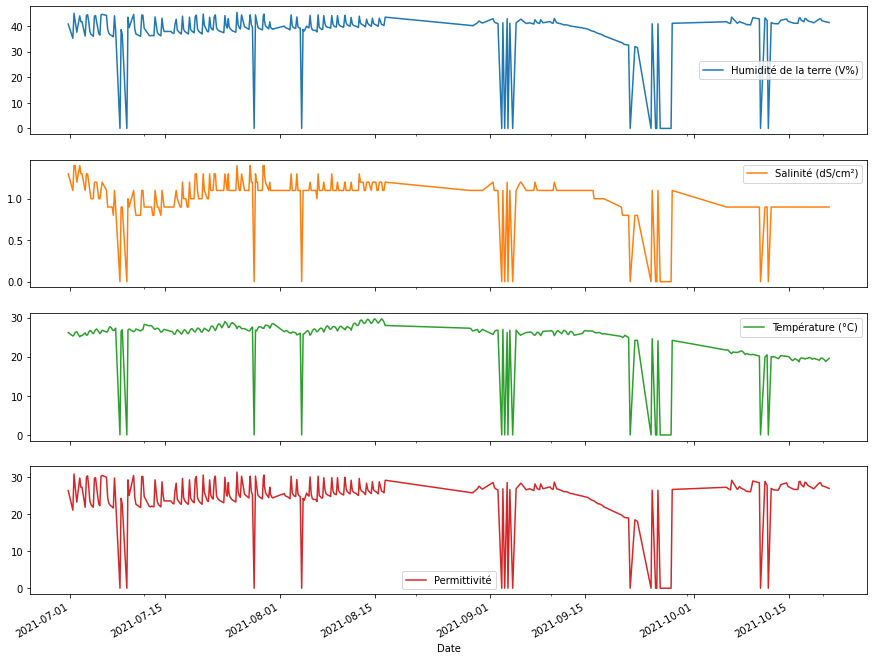

In [10]:
# Plot Time Series Plot for all features in original datframe :
Df[['Humidité de la terre (V%)','Salinité (dS/cm²)','Température (°C)','Permittivité']].plot(subplots=True,figsize=(15,12))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

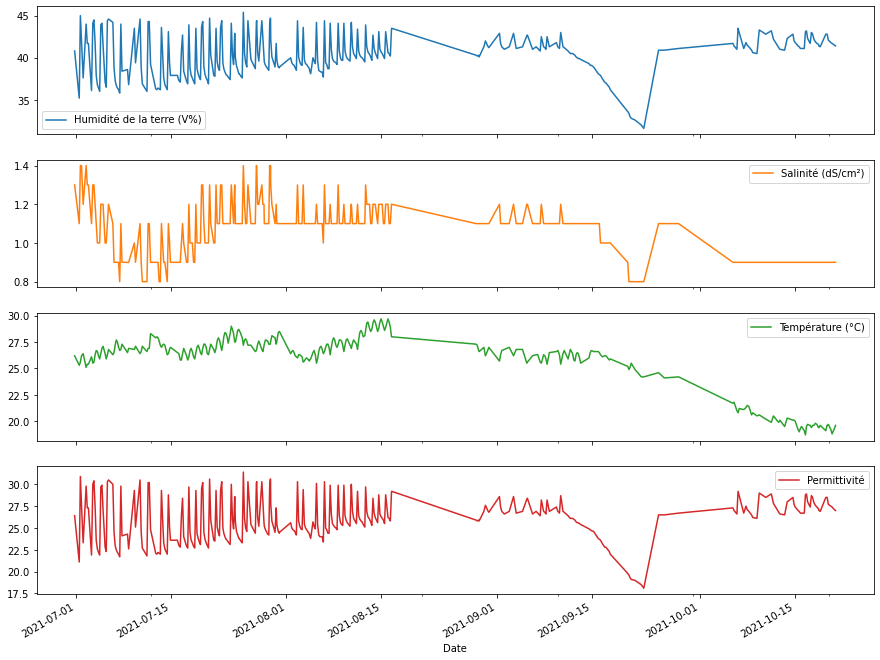

In [12]:
# Plotting for all features in datframe :
Df.plot(subplots=True,figsize=(15,12))

In [14]:
# View shape of the original dataframe
Df.shape

(362, 8)

<AxesSubplot:xlabel='Date'>

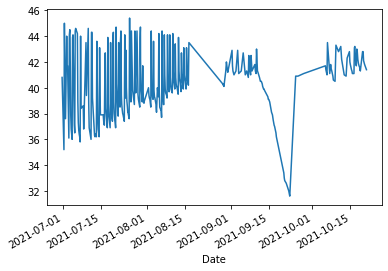

In [15]:
# Plot the humidity plot
Df["Humidité de la terre (V%)"].plot()

In [16]:
# Resample data by month
Resampling_month = Df.resample("M").mean()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

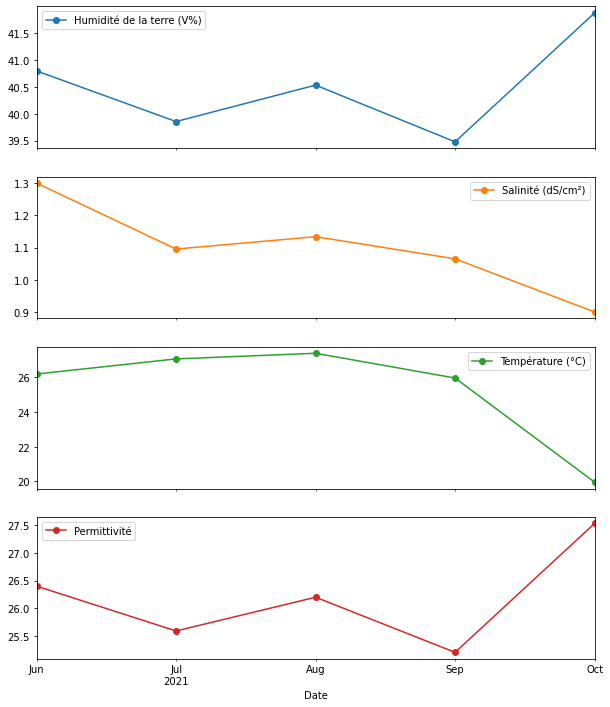

In [17]:
# Plot resampled data
Resampling_month.plot(subplots=True,figsize=(10,12),marker='o')

In [ ]:
# Resamplie by week
Resampling_week = Df.resample("W").mean()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

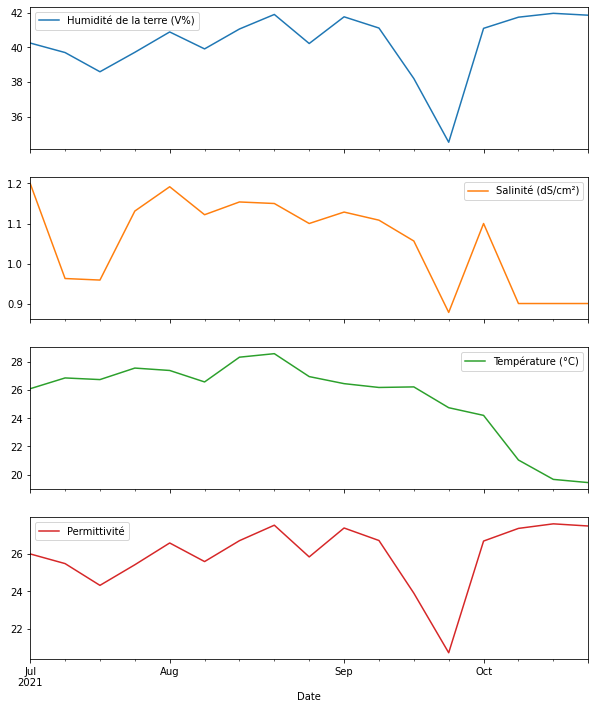

In [18]:
# Plot resampled data
Resampling_week.plot(subplots=True,figsize=(10,12))

In [19]:
# View resampled by week dataset
Resampling_week

,Humidité de la terre (V%),Salinité (dS/cm²),Température (°C),Permittivité,Erreur
Date,,,,,
2021-07-04,40.252381,1.200000,26.090476,26.009524,False
2021-07-11,39.704167,0.962500,26.854167,25.491667,False
2021-07-18,38.596552,0.958621,26.737931,24.324138,False
2021-07-25,39.717778,1.131111,27.553333,25.428889,False
2021-08-01,40.891892,1.191892,27.383784,26.597297,False
2021-08-08,39.914634,1.121951,26.570732,25.600000,False
2021-08-15,41.061538,1.153846,28.325641,26.720513,False
2021-08-22,41.900000,1.150000,28.575000,27.550000,False
2021-08-29,40.225000,1.100000,26.950000,25.850000,False


In [20]:
# Resample for 3 days based on mean
Resampling_3days = Df.resample("3D").mean()
Resampling_3days

,Humidité de la terre (V%),Salinité (dS/cm²),Température (°C),Permittivité,Erreur
Date,,,,,
2021-06-30,40.611111,1.288889,25.777778,26.322222,0.0
2021-07-03,40.150000,1.118750,26.331250,25.950000,0.0
2021-07-06,38.481818,0.927273,26.945455,24.254545,0.0
2021-07-09,40.777778,0.955556,26.966667,26.566667,0.0
2021-07-12,38.192308,0.923077,27.215385,23.938462,0.0
2021-07-15,38.990909,0.981818,26.318182,24.690909,0.0
2021-07-18,39.341176,1.064706,26.723529,25.076471,0.0
2021-07-21,39.658824,1.135294,27.647059,25.370588,0.0
2021-07-24,40.035000,1.155000,27.875000,25.730000,0.0


In [27]:
# Visualizing data between two periods
start_date = pd.to_datetime('2021-8-15')
end_date = pd.to_datetime('2021-8-23')
# Create mask to filter data between two dates
mask = (Df.index >= start_date) & (Df.index <= end_date)
# Apply mask to original dataframe
Df.loc[mask]


,RaïTech,Humidité de la terre (V%),Salinité (dS/cm²),Température (°C),Permittivité,Données,Erreur,N°
Date,,,,,,,,
2021-08-16 12:40:09,EAI N°7,43.5,1.2,28.0,29.2,1 43.5 28.0 29.2 1.2,False,268 - 2021-08-16 11:40:09.080368
2021-08-16 12:07:37,EAI N°7,43.4,1.2,28.0,29.1,1 43.4 28.0 29.1 1.2,False,267 - 2021-08-16 11:07:37.506031
2021-08-16 08:02:22,EAI N°7,40.2,1.1,28.9,25.8,1 40.2 28.9 25.8 1.1,False,266 - 2021-08-16 07:02:22.931610
2021-08-16 03:44:15,EAI N°7,40.5,1.1,29.4,26.1,1 40.5 29.4 26.1 1.1,False,265 - 2021-08-16 02:44:15.052783
2021-08-15 23:41:58,EAI N°7,40.6,1.2,29.7,26.2,1 40.6 29.7 26.2 1.2,False,264 - 2021-08-15 22:41:58.873993
2021-08-15 15:33:45,EAI N°7,43.1,1.2,28.9,28.8,1 43.1 28.9 28.8 1.2,False,263 - 2021-08-15 14:33:45.601790
2021-08-15 11:31:20,EAI N°7,39.9,1.1,28.6,25.5,1 39.9 28.6 25.5 1.1,False,262 - 2021-08-15 10:31:20.091062
2021-08-15 07:28:38,EAI N°7,40.2,1.1,29.0,25.9,1 40.2 29.0 25.9 1.1,False,261 - 2021-08-15 06:28:38.100928
2021-08-15 03:16:08,EAI N°7,40.5,1.2,29.4,26.1,1 40.5 29.4 26.1 1.2,False,260 - 2021-08-15 02:16:08.455421


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

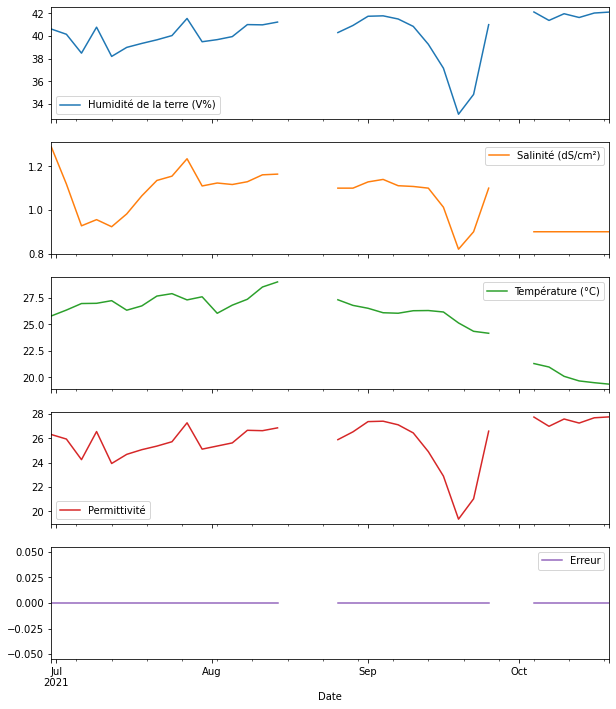

In [22]:
# Plot 3days resampled data
Resampling_3days.plot(subplots=True,figsize=(10,12))

In [23]:
# Resample by Day through mean
Resampling_days = Df.resample("D").mean()
# Check null values
Resampling_days.isnull().any().value_counts()

True    5
dtype: int64

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

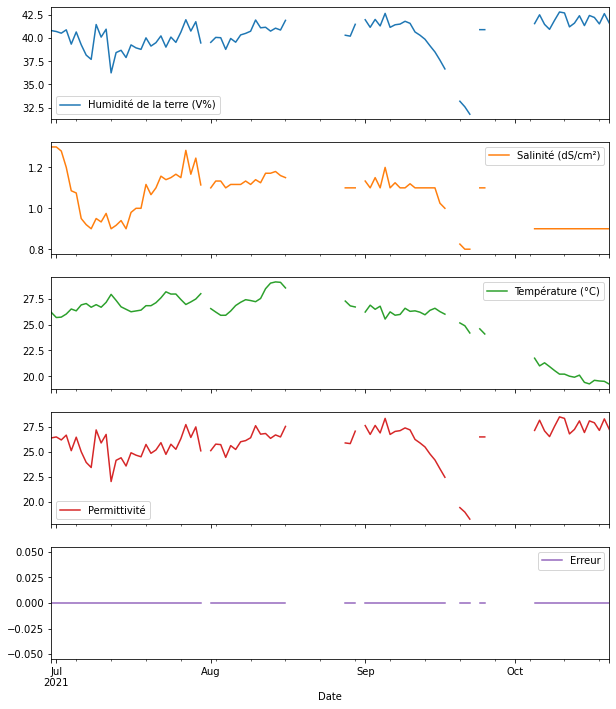

In [24]:
# Plot resampled data by day
Resampling_days.plot(subplots=True,figsize=(10,12))

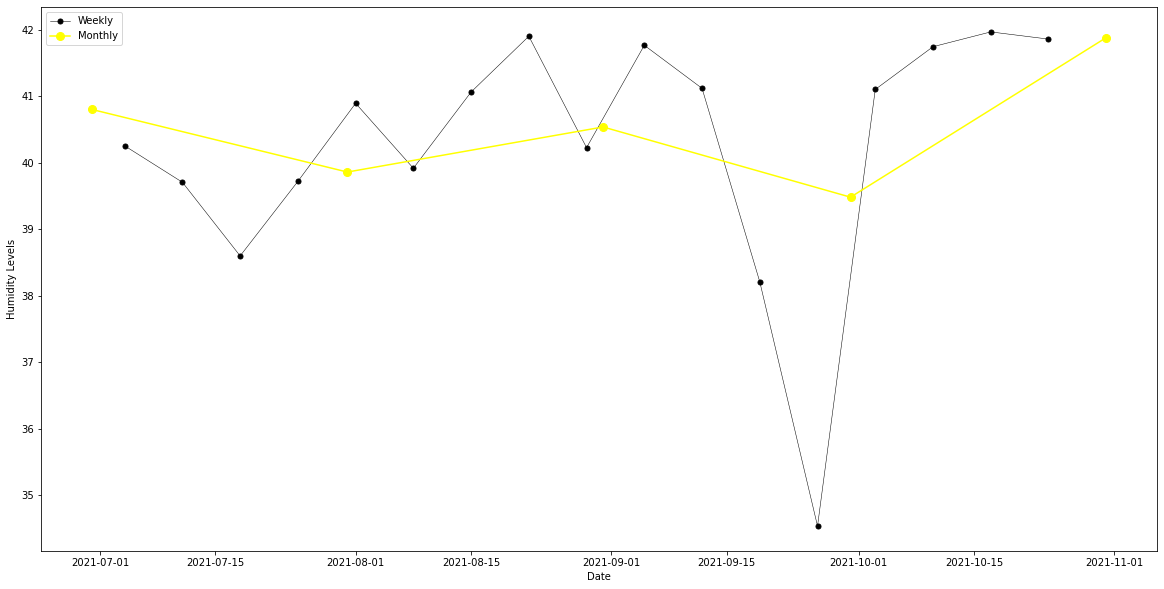

In [28]:
# Visualise to Compare humidity average monthly and weekly 
fig , ax = plt.subplots()
ax.plot(Resampling_week["Humidité de la terre (V%)"], marker='o', markersize=5, linestyle='-', linewidth = 0.5, label='Weekly' ,color='black')
ax.plot(Resampling_month["Humidité de la terre (V%)"], marker='o', markersize=8, linestyle='-', label='Monthly', color='yellow')
ax.set_ylabel("Humidity Levels")
ax.set_xlabel("Date")
ax.legend()
fig.set_size_inches(20,10)

<AxesSubplot:xlabel='Date', ylabel='seasonality in Humidity Levels V%'>

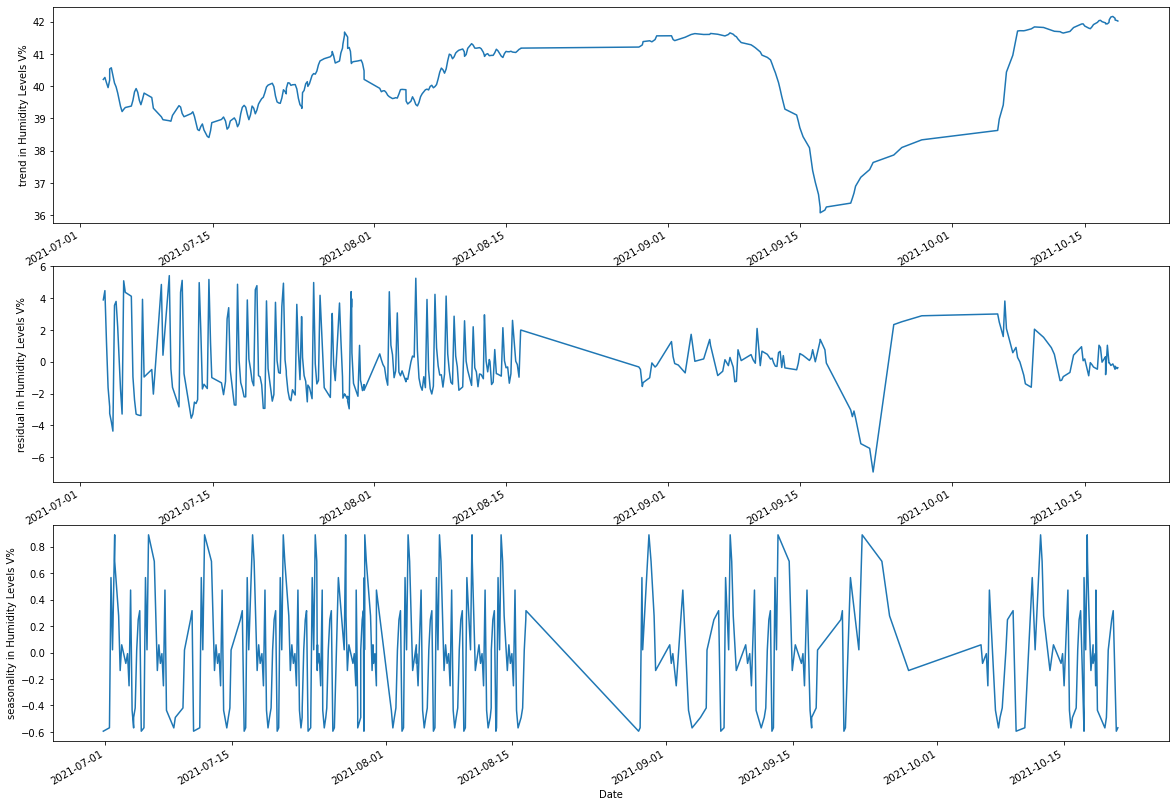

In [26]:
# Apply seasonal decomposition to humidity data using additive model over 20 days
decomposition = sm.tsa.seasonal_decompose(Df["Humidité de la terre (V%)"], 
                                   model='additive', 
                                   period=20)


# Plot decomposition
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,15))
ax1.set_ylabel('trend in Humidity Levels V%')
ax2.set_ylabel('residual in Humidity Levels V%')
ax3.set_ylabel('seasonality in Humidity Levels V%')
# Plot the trend, the seasonality, and the residuals
decomposition.trend.plot(ax=ax1)
decomposition.resid.plot(ax=ax2)
decomposition.seasonal.plot(ax=ax3)